%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore",DeprecationWarning)
arr=np.array([10,20,30,40,50])
arr_stand=(arr-arr.mean())/arr.std()
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(arr.reshape(-1,1))
from sklearn.preprocessing import MinMaxScaler 
min_max = MinMaxScaler()
min_max.fit_transform(arr.reshape(-1, 1))


In [2]:
import pandas as pd
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
data = {
    'name': ['Rex', 'Peter', 'Sam', 'Rita', 'Hilda'],
    'age': [1, 95, 22, 0, 60],
    'height': [20, 180, 160, 145, 125],
    'Weight': [0, 100, 75, 55, 140],
    'bp': [80, 100, 65, 70, 40]
}
frame = DataFrame(data)
print("Original DataFrame:")
print(frame)
frame.to_csv('patient_data.csv', index=False)
df = pd.read_csv('patient_data.csv')
print("\nDataFrame after reading from CSV:")
print(df)
df = df.replace(0, df.mean())
print("\nDataFrame after replacing 0 values with mean:")
print(df)
frame2 = df[['age', 'bp', 'height', 'Weight']]
print("\nSelected columns for scaling:")
print(frame2)
scaler = StandardScaler()
min_max = MinMaxScaler()
scaled = scaler.fit_transform(frame2)
print("\nScaled data using StandardScaler:")
print(scaled)
print("\nMean of scaled data (StandardScaler):")
print(scaled.mean(axis=0))
print("Standard deviation of scaled data (StandardScaler):")
print(scaled.std(axis=0))
scaled2 = min_max.fit_transform(frame2)
print("\nScaled data using MinMaxScaler:")
print(scaled2)
print("\nMean of scaled data (MinMaxScaler):")
print(scaled2.mean(axis=0))
print("Standard deviation of scaled data (MinMaxScaler):")
print(scaled2.std(axis=0))
sel = VarianceThreshold(threshold=(.5 * (1 - .9)))
useful_features1 = sel.fit_transform(scaled)
print("\nUseful feature values based on StandardScaler:")
print(useful_features1)
useful_features2 = sel.fit_transform(scaled2)
print("\nUseful feature values based on MinMaxScaler:")
print(useful_features2)


Original DataFrame:
    name  age  height  Weight   bp
0    Rex    1      20       0   80
1  Peter   95     180     100  100
2    Sam   22     160      75   65
3   Rita    0     145      55   70
4  Hilda   60     125     140   40

DataFrame after reading from CSV:
    name  age  height  Weight   bp
0    Rex    1      20       0   80
1  Peter   95     180     100  100
2    Sam   22     160      75   65
3   Rita    0     145      55   70
4  Hilda   60     125     140   40

DataFrame after replacing 0 values with mean:
    name   age  height  Weight   bp
0    Rex   1.0      20      74   80
1  Peter  95.0     180     100  100
2    Sam  22.0     160      75   65
3   Rita  35.6     145      55   70
4  Hilda  60.0     125     140   40

Selected columns for scaling:
    age   bp  height  Weight
0   1.0   80      20      74
1  95.0  100     180     100
2  22.0   65     160      75
3  35.6   70     145      55
4  60.0   40     125     140

Scaled data using StandardScaler:
[[-1.28721689  0.45927

C:\Users\1msccsc04\AppData\Local\Temp\ipykernel_4392\319910871.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.replace(0, df.mean())


(5,)
(5,)
[1 2 4 3 5]
[1 3 4 3 7]
(5, 1)
[[1]
 [2]
 [4]
 [3]
 [5]]
[10.1]


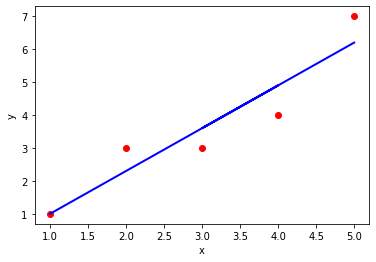

[1.3]
-0.30000000000000027
[18.7530573]


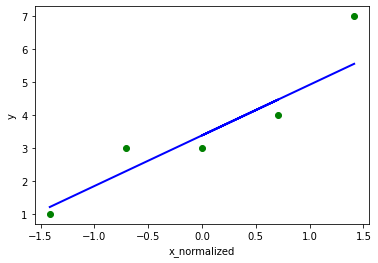

[1.5367308]
[3.38574935]


In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import SGDRegressor  
x = np.array([1,2,4,3,5]) 
y = np.array([1,3,4,3,7]) 
print(x.shape) 
print(y.shape) 
print(x) 
print(y)  
x = x.reshape(-1,1) 
print(x.shape) 
print(x) 
model = LinearRegression() 
model.fit(x, y) 
print(model.predict([[8]])) 
y_pred = model.predict(x) 
plt.scatter(x, y, color='r', marker='o') 
plt.plot(x, y_pred, color='b', linewidth=2) 
plt.xlabel('x') 
plt.ylabel('y') 
plt.show()  
print(model.coef_)  
print(model.intercept_) 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
x_stand = scaler.fit_transform(x.astype(float))
sgdr = SGDRegressor(penalty='l2', alpha=0.15, max_iter=1000) 
sgdr.fit(x_stand, y)  
print(sgdr.predict([[10]])) 
y_pred2 = sgdr.predict(x_stand) 
plt.scatter(x_stand, y, color='g', marker='o') 
plt.plot(x_stand, y_pred2, color='b', linewidth=2) 
plt.xlabel('x_normalized') 
plt.ylabel('y') 
plt.show()
print(sgdr.coef_) 
print(sgdr.intercept_)